In [94]:
import pandas as pd              #data manipulation
import numpy as np               #numerical computation
import matplotlib.pyplot as plt  #data visualization
%matplotlib inline


#graph building
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [9]:
#import csv file to create dataframe

zomato=pd.read_csv('zomato.csv')


In [5]:
zomato.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,14-Aug-2024,EQ,260.30,264.50,255.50,257.08,259.25,260.14,259.87,278.7,88.3,"4,17,35,068","10,84,55,66,362.67","3,05,078"
1,13-Aug-2024,EQ,265.00,265.40,256.00,263.43,258.19,257.08,260.16,278.7,88.3,"2,61,27,109","6,79,73,28,417.96","1,99,894"
2,12-Aug-2024,EQ,263.50,266.49,261.35,267.09,263.52,263.43,264.01,278.7,88.3,"3,35,14,964","8,84,82,12,220.08","2,77,971"
3,09-Aug-2024,EQ,267.73,272.90,265.55,265.59,266.90,267.09,269.67,278.7,88.3,"5,26,01,958","14,18,52,42,527.09","3,29,825"
4,08-Aug-2024,EQ,265.00,267.50,260.00,265.67,264.50,265.59,262.85,278.7,88.3,"5,79,17,059","15,22,34,62,598.93","4,15,998"


In [15]:
#checking details of dataset for rows count, columns data type, null values etc
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          32 non-null     datetime64[ns]
 1   series        32 non-null     object        
 2   OPEN          32 non-null     float64       
 3   HIGH          32 non-null     float64       
 4   LOW           32 non-null     float64       
 5   PREV. CLOSE   32 non-null     float64       
 6   ltp           32 non-null     float64       
 7   close         32 non-null     float64       
 8   vwap          32 non-null     float64       
 9   52W H         32 non-null     float64       
 10  52W L         32 non-null     float64       
 11  VOLUME        32 non-null     object        
 12  VALUE         32 non-null     object        
 13  No of trades  32 non-null     object        
dtypes: datetime64[ns](1), float64(9), object(4)
memory usage: 3.6+ KB


In [ ]:
#it clearly shows each column as not null, means all rows have its corresponding value.
#and NAN handling is not requred.

In [ ]:
#now since its time-series analysis, first column that is date is need to be used as
#index and it should be a date type. so lets conmvert it into date
#type using to_datetime() function

In [ ]:
#check columns name avaliable in dataset.

In [13]:
zomato.columns

Index(['Date', 'series', 'OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'ltp', 'close',
       'vwap', '52W H', '52W L', 'VOLUME', 'VALUE', 'No of trades'],
      dtype='object')

In [ ]:
#striping off any coumns name has extra spaces, it will cause issue while 
#indexing to a specific columns.

In [12]:
zomato.columns=zomato.columns.str.strip()

In [14]:
zomato['Date']=pd.to_datetime(zomato['Date'])

# EDA -explorartory data analysis starts here

In [18]:
start_date = zomato.Date.max()
start_date

Timestamp('2024-08-14 00:00:00')

In [ ]:
#above cell shows ourdataset has time stamp values in descing order, lastest
#data on top., we need to sort them in ascending order

In [27]:
zomato_sorted=zomato.sort_values('Date')
zomato_sorted.head()
zomato_sorted.tail()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
4,2024-08-08,EQ,265.00,267.50,260.00,265.67,264.50,265.59,262.85,278.7,88.3,"5,79,17,059","15,22,34,62,598.93","4,15,998"
3,2024-08-09,EQ,267.73,272.90,265.55,265.59,266.90,267.09,269.67,278.7,88.3,"5,26,01,958","14,18,52,42,527.09","3,29,825"
2,2024-08-12,EQ,263.50,266.49,261.35,267.09,263.52,263.43,264.01,278.7,88.3,"3,35,14,964","8,84,82,12,220.08","2,77,971"
1,2024-08-13,EQ,265.00,265.40,256.00,263.43,258.19,257.08,260.16,278.7,88.3,"2,61,27,109","6,79,73,28,417.96","1,99,894"
0,2024-08-14,EQ,260.30,264.50,255.50,257.08,259.25,260.14,259.87,278.7,88.3,"4,17,35,068","10,84,55,66,362.67","3,05,078"


In [29]:
start_date=zomato.Date.min()
start_date

Timestamp('2024-07-01 00:00:00')

In [30]:
end_date=zomato.Date.max()
end_date

Timestamp('2024-08-14 00:00:00')

In [41]:
print('maximum opening price:',zomato.OPEN.max())
print('minimum opening price:',zomato.OPEN.min())
print('maximum closing price:',zomato.close.max())
print('minimum closing price:',zomato.close.min())

maximum opening price: 267.73
minimum opening price: 199.71
maximum closing price: 267.09
minimum closing price: 203.97


In [48]:
days=end_date-start_date
print('we are performing analysis on data of {} days'.format(days.days))

we are performing analysis on data of 44 days


In [70]:
zomato.describe()

,Date,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L
count,32,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2024-07-22 19:30:00,229.150000,234.539062,224.614688,228.306563,230.278750,230.168437,229.974063,239.791875,79.653125
min,2024-07-01 00:00:00,199.710000,204.500000,194.560000,200.560000,203.700000,203.970000,201.160000,207.200000,73.000000
25%,2024-07-10 18:00:00,212.617500,217.712500,206.925000,212.262500,215.550000,215.995000,214.485000,217.712500,73.400000
50%,2024-07-23 12:00:00,221.750000,226.060000,216.900000,222.065000,223.730000,222.980000,221.320000,232.000000,79.300000
75%,2024-08-02 18:00:00,246.875000,264.725000,244.050000,237.837500,250.712500,250.882500,258.460000,278.700000,83.275000
max,2024-08-14 00:00:00,267.730000,278.700000,265.550000,267.090000,266.900000,267.090000,269.670000,278.700000,88.300000
std,NaN,21.775712,23.492049,20.633982,20.789706,20.956687,20.892300,21.632534,26.042995,5.886890


<Axes: >

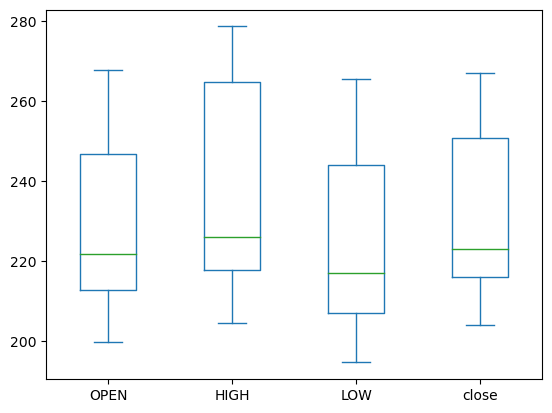

In [52]:
zomato[['OPEN','HIGH','LOW','close']].plot(kind='box')

In [53]:
print('maximum opening price:',zomato.OPEN.max())
print('minimum opening price:',zomato.OPEN.min())
print('maximum closing price:',zomato.close.max())
print('minimum closing price:',zomato.close.min())

maximum opening price: 267.73
minimum opening price: 199.71
maximum closing price: 267.09
minimum closing price: 203.97


In [ ]:
#from above grapgh we can see there is less variation between above 4 parameters, 
#and all values moving between 210 to 260.

# statistical calculations 

In [68]:
#from opening prices

max=zomato.OPEN.max()
min=zomato.OPEN.min()
mean=np.mean(zomato.OPEN)
median=np.median(zomato.OPEN)
Q1=np.percentile(zomato.OPEN, 25)
Q3=np.percentile(zomato.OPEN, 75)
IQR=Q3-Q1

print('\nmax:',max,'\nmin:',min,'\nmean:',mean,'\nmedian:',median,'\nQ1:',Q1,'\nQ3:',Q3,'\nIQR:',IQR)



max: 267.73 
min: 199.71 
mean: 229.15 
median: 221.75 
Q1: 212.6175 
Q3: 246.875 
IQR: 34.25749999999999


# ploting grapgh for closing price

In [ ]:
#below are styling options, it will be same for any plot.
#just need to use layout option with below layout variable option.

In [74]:
layout=go.Layout(
    title='zomato stock price over a month',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Arial',
            size=16,
            color='#7f7f7f')
    ),

    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Arial',
            size=16,
            color='#7f7f7f')
    )
)

In [78]:
zomato_data=[{'x':zomato['Date'],'y':zomato['OPEN']}]
plot=go.Figure(data=zomato_data, layout=layout)

In [76]:
iplot(plot)

In [ ]:
#similerway we can try ploting opening price, closing price etc

In [79]:
zomato_data=[{'x':zomato['Date'],'y':zomato['close']}]
plot=go.Figure(data=zomato_data, layout=layout)

In [80]:
iplot(plot)

In [81]:
zomato_data=[{'x':zomato['Date'],'y':zomato['HIGH']}]
plot=go.Figure(data=zomato_data, layout=layout)
iplot(plot)

In [82]:
zomato_data=[{'x':zomato['Date'],'y':zomato['LOW']}]
plot=go.Figure(data=zomato_data, layout=layout)
iplot(plot)

# building liner regression model

In [141]:
from sklearn.model_selection import train_test_split
#to split dataset into training and tetsing part.

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#to standerdu=ise thedata

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
#to evaluate performence of model



In [142]:
#x variable contains indipendent variable, and y vairiable contains dependent 
#variable or target variable.
#here indipendent variable will be date stamp and dependent variable will be
#stock closing prise.because dates will remian same every time but stock price 
#will defer day per day.
X=np.array(zomato_sorted.index).reshape(-1,1)
Y=zomato_sorted['close']
#X=zomato_sorted[['Date']]
#Y=zomato_sorted['close']
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=11)

In [143]:
#performing feature scaling

scaler = StandardScaler().fit(X_train)


In [152]:
#create linear regression model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,Y_train)
#Y_pred =lm.predict

LinearRegression()

In [150]:
#ploting graph for train datasets
trace0=go.Scatter(
    x=X_train.T[0],
    y=Y_train,
    mode='markers',
    name='Actual')

trace1=go.Scatter(
    x=X_train.T[0],
    y=lm.predict(X_train).T,
    mode='lines+markers',
    name='Predicted')

zomato_data=[trace0,trace1]
layout.xaxis.title.text='Day'
plot2 = go.Figure(data=zomato_data,layout=layout)

In [123]:
iplot(plot2)

In [164]:
#create linear regression model

Y_pred =lm.predict(X_test)

In [166]:
last_day = zomato_sorted['Date'].max()
future_dates = [last_day + pd.Timedelta(days=i) for i in range(1, 2)]
future_dates_ordinal = np.array([date.toordinal() for date in future_dates]).reshape(-1, 1)
future_predictions = lm.predict(future_dates_ordinal)                                 


# Display the predictions
print("\nFuture Predictions:")
for date, rate in zip(future_dates, future_predictions):
    print(f"DATE: {date.strftime('%Y-%m-%d')}, Predicted Value: {rate:.2f}")


Future Predictions:
DATE: 2024-08-15, Predicted Value: -1555870.66
